# DBSCAN Clustering sample (Non Hierarchical Clustering)

- Group the points of contact in the same group.
- Determine points in low-density areas as noise.
- No need to specify number of clusters.

In [1]:
from typing import Any

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn import preprocessing
from sklearn.cluster import KMeans


def process_and_fit(x_input) -> Any:
    sc = preprocessing.StandardScaler()
    return sc.fit_transform(x_input)


def return_x_y(normalized) -> tuple[Any, Any]:
    return normalized[:, 0], normalized[:, 1]


def plot_scatter(x_input, y_input, title: str) -> None:
    plt.figure(figsize=(8, 3))
    plt.scatter(x_input, y_input)
    plt.suptitle(title)
    plt.show()

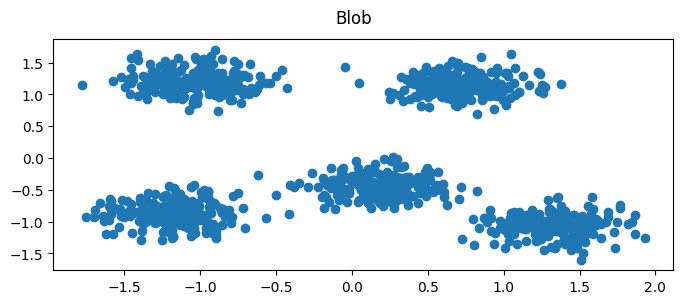

In [2]:
# Prepare dataset: Blobs
X_blob, _ = make_blobs(
    n_samples=1000,
    centers=5,
    cluster_std=1.2,
    random_state=10
)

X_blob_norm = process_and_fit(X_blob)
x_blob, y_blob = return_x_y(X_blob_norm)

plot_scatter(
    x_blob,
    y_blob,
    'Blob'
)

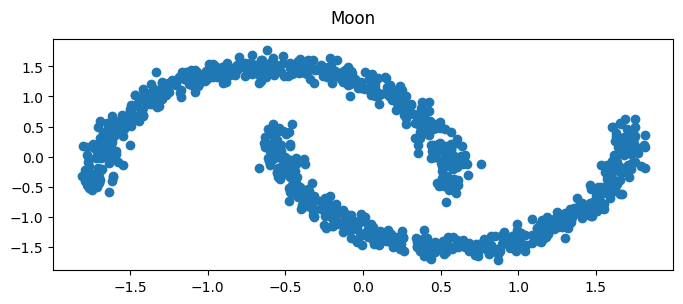

In [3]:
# Prepare dataset: Moons
X_moon, _ = make_moons(
    n_samples=1000,
    noise=0.05,
    random_state=0
)

X_moon_norm = process_and_fit(X_moon)
x_moon, y_moon = return_x_y(X_moon_norm)

plot_scatter(
    x_moon,
    y_moon,
    'Moon'
)